In [95]:
import pandas as pd

In [96]:

df = pd.read_stata("base.dta",convert_categoricals=False)
df


C:\Users\aniba\AppData\Local\Temp\ipykernel_18440\3300035126.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata("base.dta",convert_categoricals=False)


,id_vivienda,folio,id_persona,region,area,cod_upm,nse,estrato,hogar,expr,...,men18c,may60c,tipohogar,tot_hog,ind_hacina,indsan,ten_viv,ten_viv_f,allega_ext,allega_int
0,1000901,100090101,1,16,2,10009,4,1630324,1,43,...,0,1,3,1,1,1,1,1,0,0
1,1000901,100090101,2,16,2,10009,4,1630324,1,43,...,0,1,3,1,1,1,1,1,0,0
2,1000901,100090101,3,16,2,10009,4,1630324,1,44,...,0,1,3,1,1,1,1,1,0,0
3,1000902,100090201,1,16,2,10009,4,1630324,1,51,...,1,1,5,1,1,2,1,1,0,1
4,1000902,100090201,2,16,2,10009,4,1630324,1,51,...,1,1,5,1,1,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202226,4585804,458580401,2,9,1,45858,3,910113,1,93,...,1,0,3,1,1,1,1,1,0,0
202227,4585804,458580401,3,9,1,45858,3,910113,1,93,...,1,0,3,1,1,1,1,1,0,0
202228,4585807,458580701,1,9,1,45858,3,910113,1,89,...,1,0,3,1,1,1,1,1,0,0
202229,4585807,458580701,2,9,1,45858,3,910113,1,88,...,1,0,3,1,1,1,1,1,0,0


In [97]:
import pandas as pd

df_casen     = pd.read_stata("base.dta", convert_categoricals=False)
df_territorio = pd.read_stata("baseprovincia.dta", convert_categoricals=False)
df_merged = df_casen.merge(df_territorio,on=["folio", "id_persona"],how="left")



C:\Users\aniba\AppData\Local\Temp\ipykernel_18440\440824041.py:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_casen     = pd.read_stata("base.dta", convert_categoricals=False)


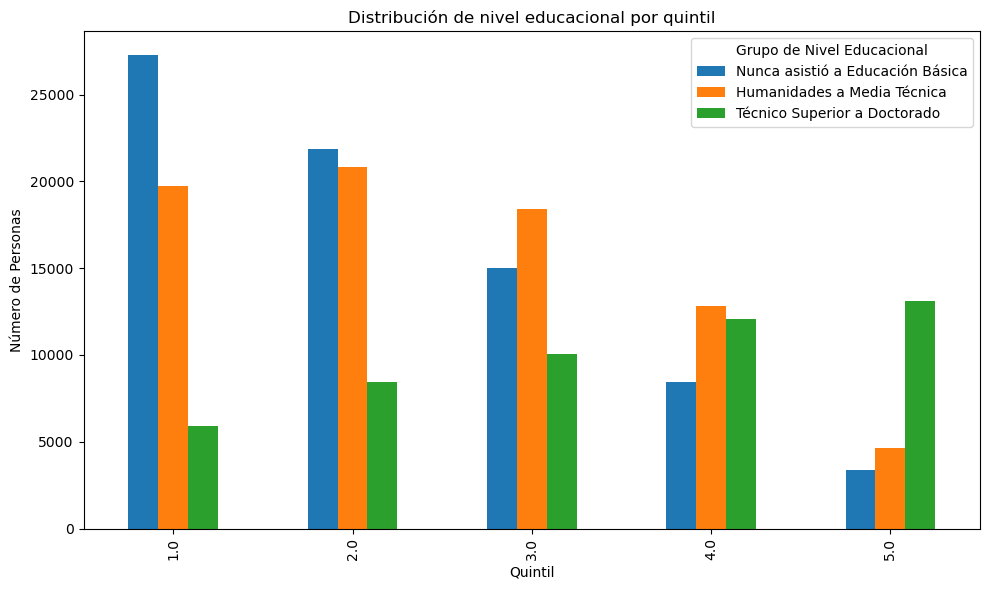

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

def agrupar_nivel(e6a):
    if e6a in [1, 2, 3, 4, 5, 6, 7]:
        return "Nunca asistió a Educación Básica"
    elif e6a in [8, 9, 10, 11]:
        return "Humanidades a Media Técnica"
    elif e6a in [12, 13, 14, 15]:
        return "Técnico Superior a Doctorado"
    else:
        return "Sin datos"

df_merged['grupo_nivel'] = df_merged['e6a'].apply(agrupar_nivel)

conteo = pd.crosstab(df_merged['grupo_nivel'], df_merged['qaut'])

orden_grupos = [
    "Nunca asistió a Educación Básica",
    "Humanidades a Media Técnica",
    "Técnico Superior a Doctorado"
]
conteo = conteo.reindex(orden_grupos)
conteo.T.plot(kind='bar', figsize=(10,6))  
plt.title('Distribución de nivel educacional por quintil')
plt.xlabel('Quintil')
plt.ylabel('Número de Personas')
plt.legend(title='Grupo de Nivel Educacional')
plt.tight_layout()
plt.show()


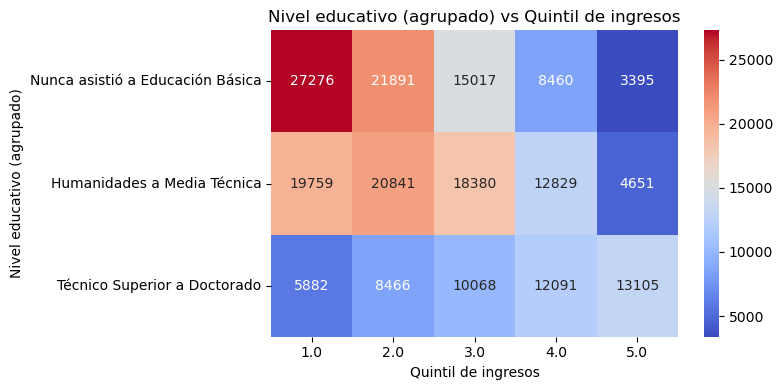

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def agrupar_nivel(e6a):
    if e6a in [1, 2, 3, 4, 5, 6, 7]:
        return "Nunca asistió a Educación Básica"
    elif e6a in [8, 9, 10, 11]:
        return "Humanidades a Media Técnica"
    elif e6a in [12, 13, 14, 15]:
        return "Técnico Superior a Doctorado"
    else:
        return "Sin datos"

df_merged['grupo_nivel'] = df_merged['e6a'].apply(agrupar_nivel)

conteo = pd.crosstab(df_merged['grupo_nivel'], df_merged['qaut'])

orden_grupos = [
    "Nunca asistió a Educación Básica",
    "Humanidades a Media Técnica",
    "Técnico Superior a Doctorado"
]
conteo = conteo.reindex(orden_grupos)

plt.figure(figsize=(8, 4))
sns.heatmap(conteo, annot=True, fmt='d', cmap='coolwarm')
plt.title("Nivel educativo (agrupado) vs Quintil de ingresos")
plt.xlabel("Quintil de ingresos")
plt.ylabel("Nivel educativo (agrupado)")
plt.tight_layout()
plt.show()


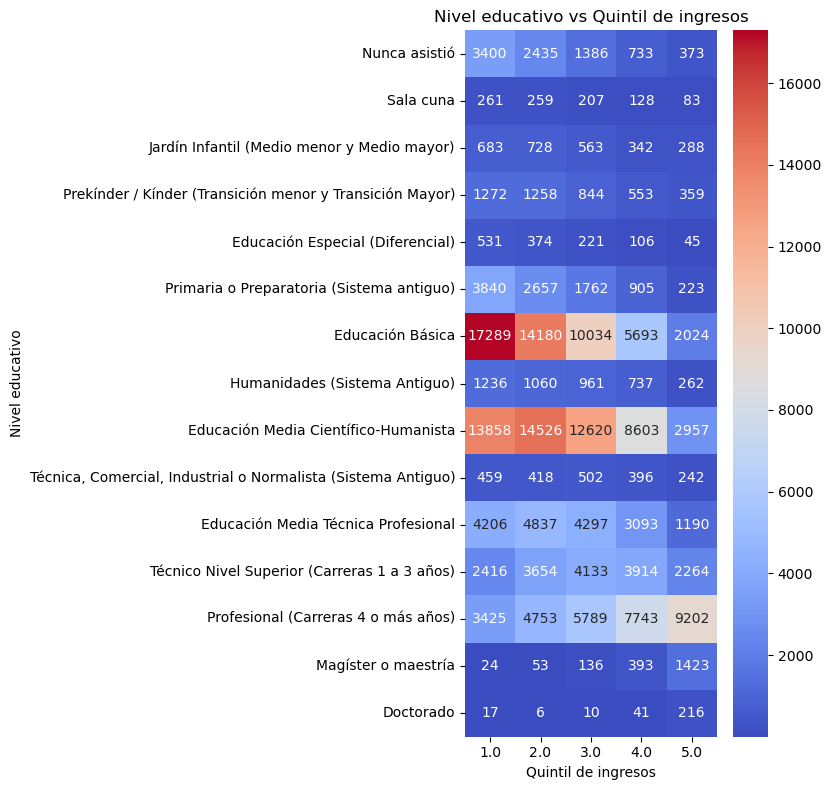

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

niveles_educacionales = [
    "Nunca asistió",
    "Sala cuna",
    "Jardín Infantil / Kinder",
    "Educación Especial",
    "Primario o Preparatoria",
    "Educación Básica",
    "Humanidades (Sistema Antiguo)",
    "E. Media (Científico-Humanista)",
    "Técnica, Comercial, industrial o Normalista (Sistema Antiguo)",
    "Técnico Profesional",
    "Educ. Superior (≥ 4 años)",
    "Magíster o más",
    "Doctorado"
]
niveles_educacionales = [
    "Nunca asistió",
    "Sala cuna",
    "Jardín Infantil (Medio menor y Medio mayor)",
    "Prekínder / Kínder (Transición menor y Transición Mayor)",
    "Educación Especial (Diferencial)",
    "Primaria o Preparatoria (Sistema antiguo)",
    "Educación Básica",
    "Humanidades (Sistema Antiguo)",
    "Educación Media Científico-Humanista",
    "Técnica, Comercial, Industrial o Normalista (Sistema Antiguo)",
    "Educación Media Técnica Profesional",
    "Técnico Nivel Superior (Carreras 1 a 3 años)",
    "Profesional (Carreras 4 o más años)",
    "Magíster o maestría",
    "Doctorado"
]

conteo = pd.crosstab(df_merged['e6a'], df_merged['qaut'])

conteo = conteo.reindex(range(1, 16))

plt.figure(figsize=(8, 8))
sns.heatmap(conteo, annot=True, fmt='d', cmap='coolwarm',
            yticklabels=niveles_educacionales)
plt.title("Nivel educativo vs Quintil de ingresos")
plt.xlabel("Quintil de ingresos")
plt.ylabel("Nivel educativo")
plt.tight_layout()
plt.show()


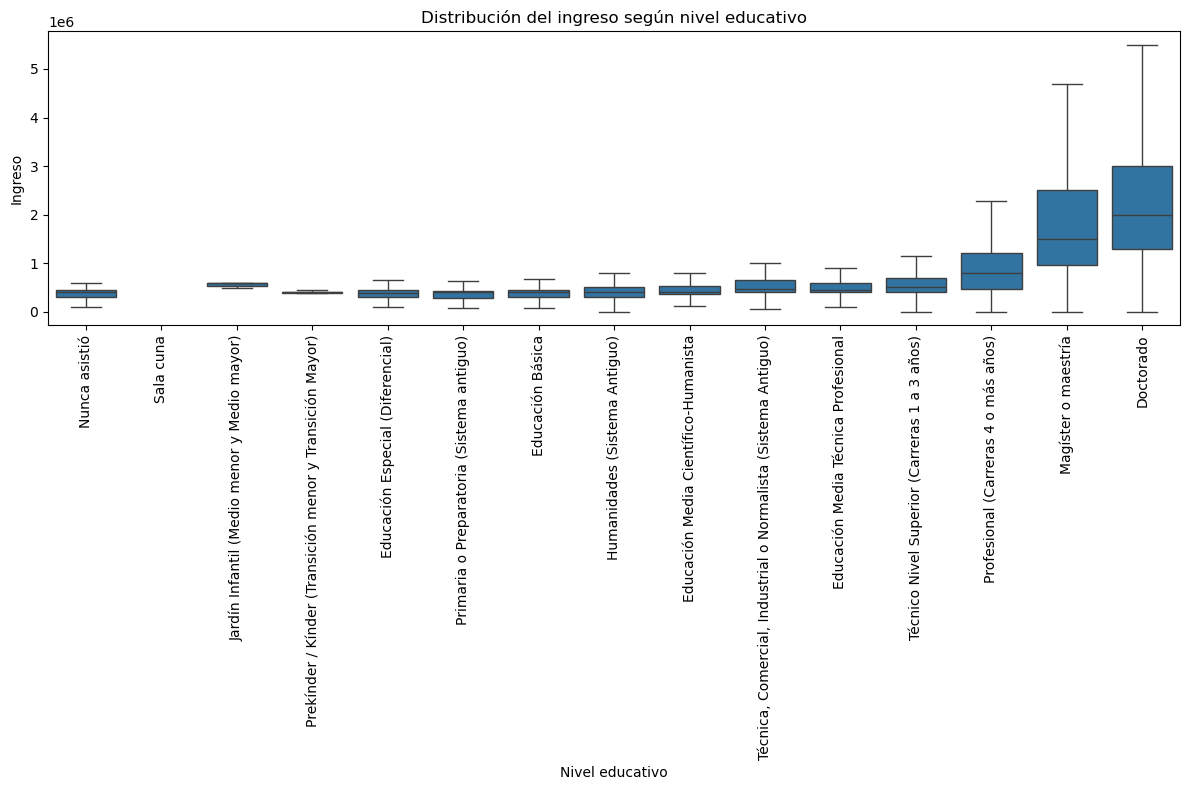

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

niveles_educacionales = [
    "Nunca asistió",
    "Sala cuna",
    "Jardín Infantil (Medio menor y Medio mayor)",
    "Prekínder / Kínder (Transición menor y Transición Mayor)",
    "Educación Especial (Diferencial)",
    "Primaria o Preparatoria (Sistema antiguo)",
    "Educación Básica",
    "Humanidades (Sistema Antiguo)",
    "Educación Media Científico-Humanista",
    "Técnica, Comercial, Industrial o Normalista (Sistema Antiguo)",
    "Educación Media Técnica Profesional",
    "Técnico Nivel Superior (Carreras 1 a 3 años)",
    "Profesional (Carreras 4 o más años)",
    "Magíster o maestría",
    "Doctorado"
]

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='e6a',
    y='y1',
    data=df_merged,
    showfliers=False  
)
plt.xticks(ticks=range(15), labels=niveles_educacionales, rotation=90)
plt.title('Distribución del ingreso según nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingreso')
plt.tight_layout()
plt.show()


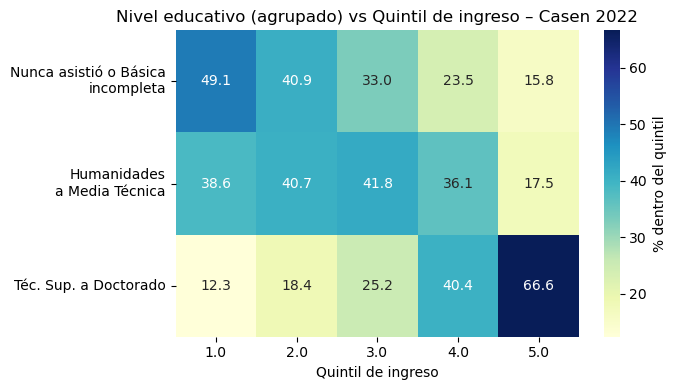

In [102]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

def agrupar_nivel(e6a):
    if e6a in range(1,8):
        return "Nunca asistió o Básica\nincompleta"
    elif e6a in range(8,12):
        return "Humanidades\na Media Técnica"
    elif e6a in range(12,16):
        return "Téc. Sup. a Doctorado"
    else:
        return "Sin datos"

df = df_merged.copy()
df["grupo_nivel"] = df["e6a"].apply(agrupar_nivel)

tab = (
    (pd.crosstab(
         df["grupo_nivel"], df["qaut"],
         values=df["expr"],            
         aggfunc="sum",
         normalize="columns"           
     ) * 100)                         
     .loc[
         ["Nunca asistió o Básica\nincompleta",
          "Humanidades\na Media Técnica",
          "Téc. Sup. a Doctorado"]
     ]                                 
)

plt.figure(figsize=(7,4))
sns.heatmap(tab, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={"label": "% dentro del quintil"})
plt.title("Nivel educativo (agrupado) vs Quintil de ingreso – Casen 2022")
plt.xlabel("Quintil de ingreso")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [103]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import joypy                                                      # ridgelines

VAR = dict(ingreso="yaut", nivel="e6a", peso="expr")

def agrupar_nivel(e6a):
    if e6a in range(1,8):
        return "Nunca asistió a Básica"
    elif e6a in range(8,12):
        return "Humanidades–Media Técnica"
    elif e6a in range(12,16):
        return "Téc. Sup. – Doctorado"
    else:
        return np.nan

df = df.copy()
df["edu_grp"] = df[VAR["nivel"]].apply(agrupar_nivel)
df = df.dropna(subset=[VAR["ingreso"], "edu_grp"])


In [104]:
import pandas as pd

cod = pd.read_excel("codigos.xlsx", sheet_name="E", header=None)

tabla = cod.iloc[106:118]  

cinef13_map = dict(zip(tabla[3], tabla[4]))

print(cinef13_map)


{1: 'Salud y Bienestar', 2: 'Ingeniería, Industria y Construcción', 3: 'Educación', 4: 'Servicios', 5: 'Administración de Empresas y Derecho', 6: 'Ciencias Sociales, Periodismo e Información', 7: 'Ciencias naturales, matemáticas y estadística', 8: 'Agricultura, Silvicultura, Pesca y Veterinaria', 9: 'Tecnología de la Información y la Comunicación (TIC)', 10: 'Artes y Humanidades', 11: 'Doctorado en Ciencias Básicas', 88: 'Sin dato'}


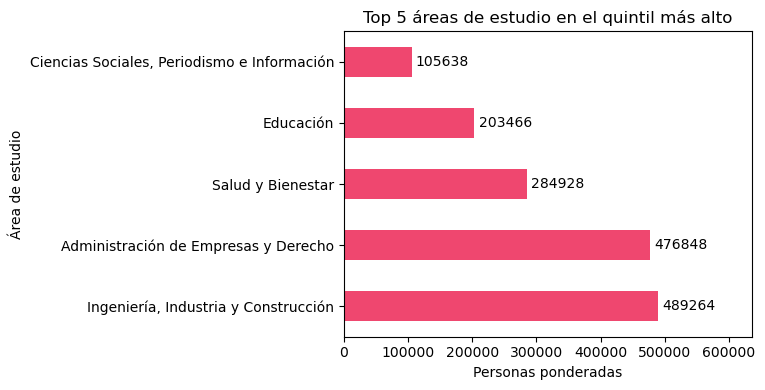

In [105]:
top_q5 = (
    df[df["qaut"] == 5]
      .groupby("cinef13_area")[VAR["peso"]].sum()
      .sort_values(ascending=False)
      .head(5)
      .rename(index=cinef13_map)  
)
ax = top_q5.plot(kind="barh", color="#EF476F", figsize=(8,4))
ax.set_xlabel("Personas ponderadas")
ax.set_ylabel("Área de estudio")
ax.set_title("Top 5 áreas de estudio en el quintil más alto")
ax.bar_label(ax.containers[0], fmt="%.0f", padding=3)
plt.tight_layout()
ax.set_xlim(right=top_campo.max() * 1.3)

plt.show()


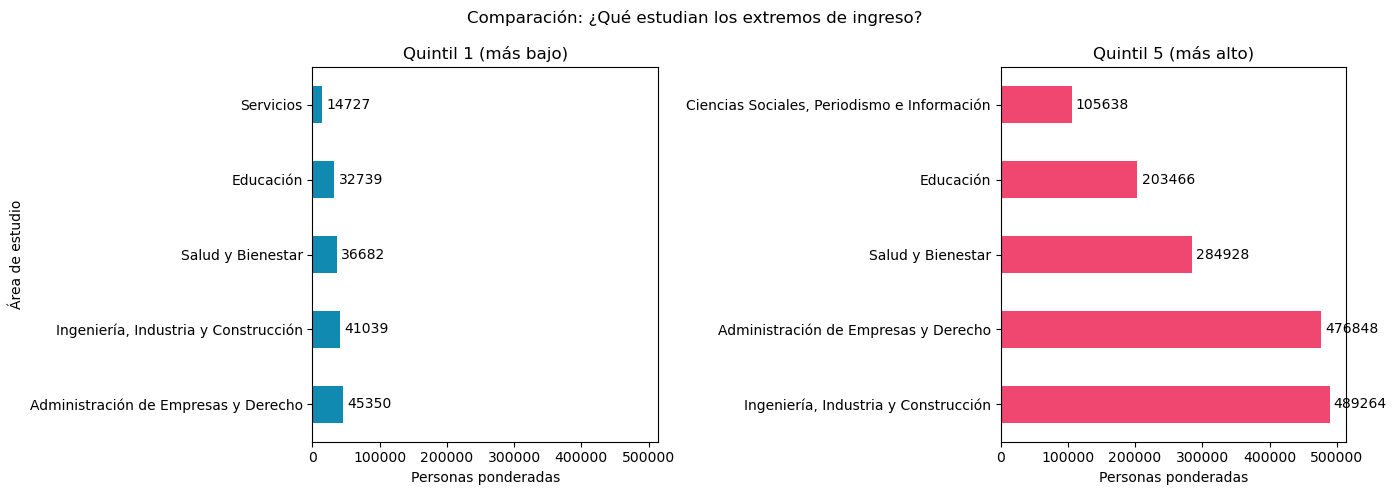

In [106]:
top_q1 = (
    df[df["qaut"] == 1]
      .groupby("cinef13_area")[VAR["peso"]].sum()
      .sort_values(ascending=False)
      .head(5)
      .rename(index=cinef13_map)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

top_q1.plot(kind="barh", ax=axes[0], color="#118AB2")
axes[0].set_title("Quintil 1 (más bajo)")
axes[0].set_xlabel("Personas ponderadas")
axes[0].set_ylabel("Área de estudio")
axes[0].bar_label(axes[0].containers[0], fmt="%.0f", padding=3)

top_q5.plot(kind="barh", ax=axes[1], color="#EF476F")
axes[1].set_title("Quintil 5 (más alto)")
axes[1].set_xlabel("Personas ponderadas")
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0], fmt="%.0f", padding=3)

fig.suptitle("Comparación: ¿Qué estudian los extremos de ingreso?")
plt.tight_layout()

plt.show()


C:\Users\aniba\AppData\Local\Temp\ipykernel_18440\3030108870.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x[VAR["ingreso"]], weights=x[VAR["peso"]]))


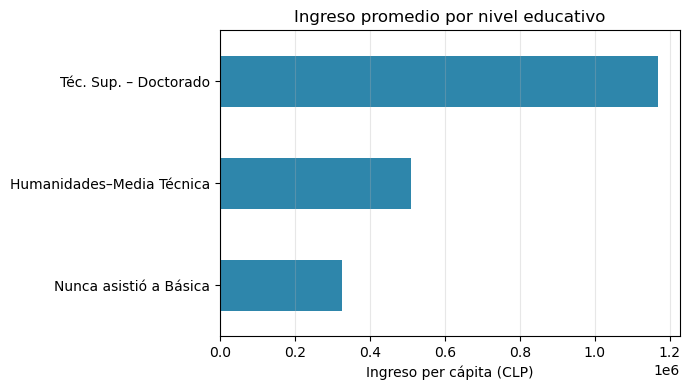

In [107]:
medias = (
    df.groupby("edu_grp")
      .apply(lambda x: np.average(x[VAR["ingreso"]], weights=x[VAR["peso"]]))
      .sort_values()
)

medias.plot(kind='barh', color="#2E86AB", figsize=(7,4))
plt.title("Ingreso promedio por nivel educativo")
plt.xlabel("Ingreso per cápita (CLP)")
plt.ylabel("")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


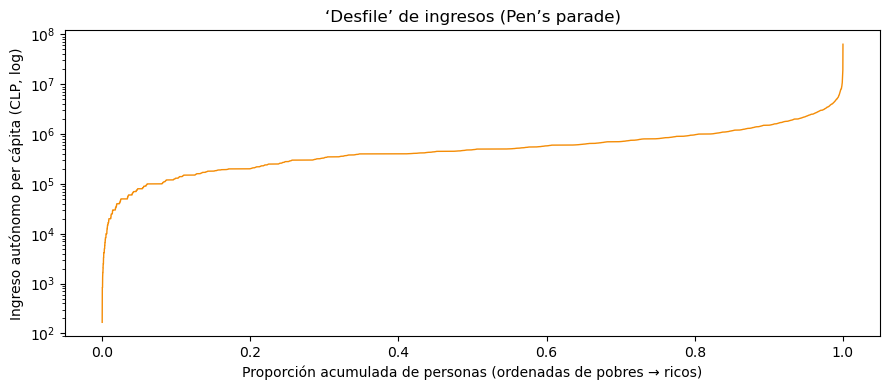

In [108]:
df_sorted = df.sort_values(VAR["ingreso"])
df_sorted["rank"] = np.cumsum(df_sorted[VAR["peso"]]) / df_sorted[VAR["peso"]].sum()

plt.figure(figsize=(9,4))
plt.plot(df_sorted["rank"], df_sorted[VAR["ingreso"]], color="#F48C06", lw=1)
plt.yscale("log")
plt.xlabel("Proporción acumulada de personas (ordenadas de pobres → ricos)")
plt.ylabel("Ingreso autónomo per cápita (CLP, log)")
plt.title("‘Desfile’ de ingresos (Pen’s parade)")
plt.tight_layout(); plt.show()


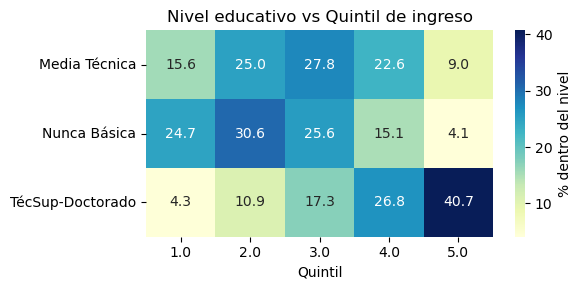

C:\Users\aniba\AppData\Local\Temp\ipykernel_18440\268014227.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x[VAR["ing"]], weights=x[VAR["peso"]]))


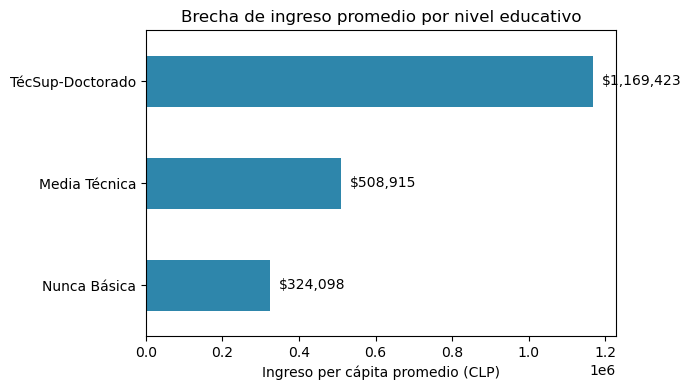

C:\Users\aniba\AppData\Local\Temp\ipykernel_18440\268014227.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x[VAR["ing"]]*x[VAR["peso"]]).sum())


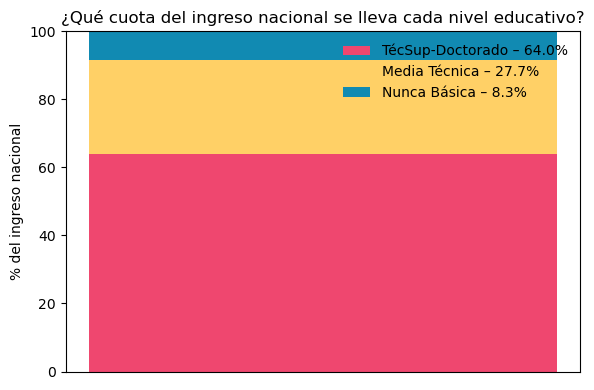

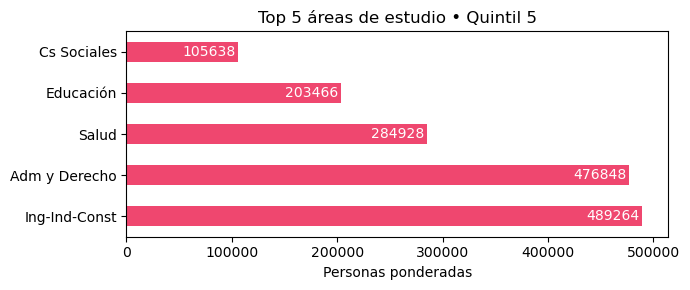

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

VAR = dict(
    ing    = "yaut",
    nivel  = "e6a",
    peso   = "expr",
    quintil= "qaut",
    area   = "cinef13_area"
)



def agrup(e):
    if 1 <= e <= 7:    return "Nunca Básica"
    if 8 <= e <= 11:   return "Media Técnica"
    if 12 <= e <= 15:  return "TécSup‑Doctorado"
    return np.nan

df["edu_grp"] = df[VAR["nivel"]].apply(agrup)
df = df.dropna(subset=["edu_grp", VAR["ing"], VAR["quintil"]])

#O:Heat‑map (Opening)
tab = pd.crosstab(
    df["edu_grp"], df[VAR["quintil"]],
    values=df[VAR["peso"]], aggfunc="sum", normalize="index"
) * 100

plt.figure(figsize=(6,3))
sns.heatmap(tab, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={"label":"% dentro del nivel"})
plt.title("Nivel educativo vs Quintil de ingreso")
plt.xlabel("Quintil"); plt.ylabel("")
plt.tight_layout(); plt.show()

#C :Ingreso promedio por grupo (barra horizontal)
prom = (
    df.groupby("edu_grp")
      .apply(lambda x: np.average(x[VAR["ing"]], weights=x[VAR["peso"]]))
      .sort_values()
)

fig, ax = plt.subplots(figsize=(7,4))
prom.plot(kind="barh", ax=ax, color="#2E86AB")
ax.set_xlabel("Ingreso per cápita promedio (CLP)")
ax.set_ylabel("")
ax.set_title("Brecha de ingreso promedio por nivel educativo")
for i, v in enumerate(prom):
    ax.text(v + prom.max()*0.02, i, f"${v:,.0f}", va="center")
plt.tight_layout(); plt.show()

#A: Participación de ingreso total (100 % apilado) 
share = (
    df.groupby("edu_grp")
      .apply(lambda x: (x[VAR["ing"]]*x[VAR["peso"]]).sum())
)
share = (share / share.sum() * 100).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(0, share.sum(), color="white")  # base
bottom = 0
colors = ["#EF476F", "#FFD066", "#118AB2"]
for (grp, pct), col in zip(share.items(), colors):
    ax.bar(0, pct, bottom=bottom, color=col, label=f"{grp} – {pct:.1f}%")
    bottom += pct
ax.set_ylim(0,100)
ax.set_xticks([]); ax.set_ylabel("% del ingreso nacional")
ax.set_title("¿Qué cuota del ingreso nacional se lleva cada nivel educativo?")
ax.legend(loc="upper right", frameon=False)
plt.tight_layout(); plt.show()


#R: Top 5 áreas de estudio (Resolution)
cine_map = {
    1:'Salud',2:'Ing-Ind-Const',3:'Educación',4:'Servicios',
    5:'Adm y Derecho',6:'Cs Sociales',7:'Cs Nat-Mat-Est',
    8:'Agro-Pesca',9:'TIC',10:'Artes',11:'Doctorado',88:'s/d'
}
top5 = (
    df[df[VAR["quintil"]]==5]
      .groupby(VAR["area"])[VAR["peso"]].sum()
      .sort_values(ascending=False)
      .head(5)
      .rename(index=cine_map)
)

ax = top5.plot.barh(color="#EF476F", figsize=(7,3))
ax.set_xlabel("Personas ponderadas"); ax.set_ylabel("")
ax.set_title("Top 5 áreas de estudio • Quintil 5")
ax.bar_label(ax.containers[0], fmt="%.0f", padding=-40, color="white")
plt.tight_layout(); plt.show()
